<a href="https://colab.research.google.com/github/Tobifads/Breast-Cancer-predictor/blob/main/Fadeyi_Oluwatobi_ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Breast_Cancer_Mortality_Survival_Dataset.csv')
df.head()

Patient ID   Moth of Birth   Age     Sex   Race Marital Status  \
0       A0012             12  68.0  Female  White        Married   
1       A0013             12  50.0  Female  White        Married   
2       A0014             11  58.0  Female  White       Divorced   
3       A0015              3  58.0  Female  White        Married   
4       A0016              1  47.0  Female  White        Married   

   Occupation Code  Adopted Status T Stage  N Stage  ...  \
0             11.0               1       T1      N1  ...   
1             11.0               0       T2      N2  ...   
2              9.0               0       T3      N3  ...   
3             10.0               0       T1      N1  ...   
4             12.0               0       T2      N1  ...   

               differentiate Grade   A Stage Tumor Size  Estrogen Status  \
0      Poorly differentiated     3  Regional        4.0         Positive   
1  Moderately differentiated     2  Regional       35.0         Positive   
2  Moderately differentiated     2  Regional       63.0         Positive   
3      Poorly differentiated     3  Regional       18.0         Positive   
4      Poorly differentiated     3  Regional       41.0         Positive   

  Progesterone Status Regional Node Examined Reginol Node Positive  \
0            Positive                     24                     1   
1            Positive                     14                     5   
2            Positive                     14                     7   
3            Positive                      2                     1   
4            Positive                      3                     1   

  Survival Months  Mortality_Status  
0              60             Alive  
1              62             Alive  
2              75             Alive  
3              84             Alive  
4              50             Alive  

[5 rows x 21 columns]

In [ ]:
df.shape

(4024, 21)

In [ ]:
data = df.rename(columns={'Patient ID ': "Patient ID", 'Moth of Birth': 'Month of Birth', 'T Stage ': 'T Stage', 'Reginol Node Positive': 'Regional Node Positive'})
data.head()

Patient ID  Month of Birth   Age     Sex   Race Marital Status  \
0      A0012              12  68.0  Female  White        Married   
1      A0013              12  50.0  Female  White        Married   
2      A0014              11  58.0  Female  White       Divorced   
3      A0015               3  58.0  Female  White        Married   
4      A0016               1  47.0  Female  White        Married   

   Occupation Code  Adopted Status T Stage N Stage  ...  \
0             11.0               1      T1      N1  ...   
1             11.0               0      T2      N2  ...   
2              9.0               0      T3      N3  ...   
3             10.0               0      T1      N1  ...   
4             12.0               0      T2      N1  ...   

               differentiate Grade   A Stage Tumor Size  Estrogen Status  \
0      Poorly differentiated     3  Regional        4.0         Positive   
1  Moderately differentiated     2  Regional       35.0         Positive   
2  Moderately differentiated     2  Regional       63.0         Positive   
3      Poorly differentiated     3  Regional       18.0         Positive   
4      Poorly differentiated     3  Regional       41.0         Positive   

  Progesterone Status Regional Node Examined Regional Node Positive  \
0            Positive                     24                      1   
1            Positive                     14                      5   
2            Positive                     14                      7   
3            Positive                      2                      1   
4            Positive                      3                      1   

  Survival Months  Mortality_Status  
0              60             Alive  
1              62             Alive  
2              75             Alive  
3              84             Alive  
4              50             Alive  

[5 rows x 21 columns]

In [ ]:
data.describe()

Month of Birth          Age  Occupation Code  Adopted Status  \
count     4024.000000  4015.000000      4021.000000     4024.000000   
mean         6.481362    54.094396         8.427257        0.496769   
std          3.475442    11.417118         4.637345        0.500052   
min          1.000000    30.000000         1.000000        0.000000   
25%          3.000000    47.000000         4.000000        0.000000   
50%          6.000000    54.000000         8.000000        0.000000   
75%         10.000000    61.000000        12.000000        1.000000   
max         12.000000   502.000000        16.000000        1.000000   

             Grade   Tumor Size  Survival Months  
count  4024.000000  4021.000000      4024.000000  
mean      2.150596    30.419299        71.472167  
std       0.638234    21.161080        25.361855  
min       1.000000   -75.000000         1.000000  
25%       2.000000    16.000000        56.000000  
50%       2.000000    25.000000        73.000000  
75%       3.000000    38.000000        90.000000  
max       4.000000   140.000000       760.000000

In [ ]:
data.describe(include='object')

Patient ID     Sex   Race Marital Status T Stage N Stage 6th Stage  \
count        4024    3947   4024           4024    4024    4024      4024   
unique       4024       1      3              5       4       3         5   
top         A0012  Female  White        Married      T2      N1       IIA   
freq            1    3947   3413           2643    1786    2732      1305   

                    differentiate   A Stage Estrogen Status  \
count                        4024      4024            4024   
unique                          4         2               2   
top     Moderately differentiated  Regional        Positive   
freq                         2351      3932            3755   

       Progesterone Status Regional Node Examined Regional Node Positive  \
count                 4024                   4023                   4024   
unique                   2                     56                     39   
top               Positive                     13                      1   
freq                  3326                    251                   1521   

       Mortality_Status  
count              4020  
unique                6  
top               Alive  
freq               3396

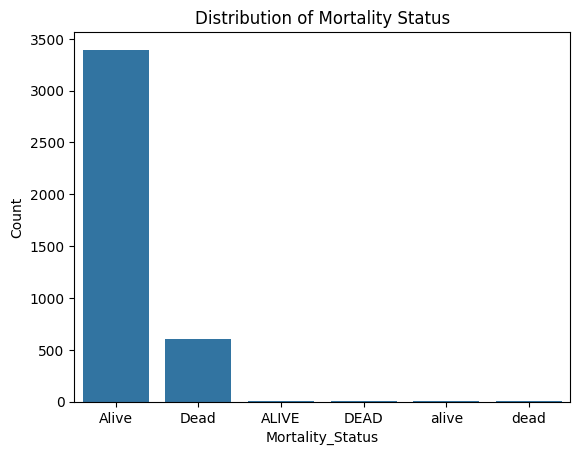

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='Mortality_Status')
plt.title('Distribution of Mortality Status')
plt.xlabel('Mortality_Status')
plt.ylabel('Count')
plt.show()

In [ ]:
data = data.drop(['Patient ID', 'Month of Birth', 'Sex', 'Occupation Code', 'Adopted Status', 'A Stage', 'Survival Months'], axis=1)
data.head()

Age   Race Marital Status T Stage N Stage 6th Stage  \
0  68.0  White        Married      T1      N1       IIA   
1  50.0  White        Married      T2      N2      IIIA   
2  58.0  White       Divorced      T3      N3      IIIC   
3  58.0  White        Married      T1      N1       IIA   
4  47.0  White        Married      T2      N1       IIB   

               differentiate  Grade  Tumor Size Estrogen Status  \
0      Poorly differentiated      3         4.0        Positive   
1  Moderately differentiated      2        35.0        Positive   
2  Moderately differentiated      2        63.0        Positive   
3      Poorly differentiated      3        18.0        Positive   
4      Poorly differentiated      3        41.0        Positive   

  Progesterone Status Regional Node Examined Regional Node Positive  \
0            Positive                     24                      1   
1            Positive                     14                      5   
2            Positive                     14                      7   
3            Positive                      2                      1   
4            Positive                      3                      1   

  Mortality_Status  
0            Alive  
1            Alive  
2            Alive  
3            Alive  
4            Alive

In [ ]:
for col in data.columns:
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'Age': [ 68.  50.  58.  47.  51.  40.  69.  46.  65.  48.  62.  61.  56.  43.
  60.  57.  55.  63.  66.  53.  59.  54.  49.  64.  42.  nan  37.  67.
  31.  52.  33.  45.  38.  39.  36.  41.  44.  32.  34. 502.  35.  30.]
Unique values in column 'Race': ['White' 'Black' 'Other']
Unique values in column 'Marital Status': ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
Unique values in column 'T Stage': ['T1' 'T2' 'T3' 'T4']
Unique values in column 'N Stage': ['N1' 'N2' 'N3']
Unique values in column '6th Stage': ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
Unique values in column 'differentiate': ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Unique values in column 'Grade': [3 2 1 4]
Unique values in column 'Tumor Size': [  4.  35.  63.  18.  41.  20.   8.  30. 103.  32.  13.  59.  15.  19.
  46.  24.  25.  29.  40.  70.  22.  50.  17.  21.  10.  27.  23.   5.
  51.   9.  55. 120.  77.   2.  11.  12.  26.  75. 130.  34

In [ ]:
data.shape

(4024, 14)

In [ ]:
data.describe()

Age        Grade   Tumor Size
count  4015.000000  4024.000000  4021.000000
mean     54.094396     2.150596    30.419299
std      11.417118     0.638234    21.161080
min      30.000000     1.000000   -75.000000
25%      47.000000     2.000000    16.000000
50%      54.000000     2.000000    25.000000
75%      61.000000     3.000000    38.000000
max     502.000000     4.000000   140.000000

In [ ]:
data.describe().transpose()

count       mean        std   min   25%   50%   75%    max
Age         4015.0  54.094396  11.417118  30.0  47.0  54.0  61.0  502.0
Grade       4024.0   2.150596   0.638234   1.0   2.0   2.0   3.0    4.0
Tumor Size  4021.0  30.419299  21.161080 -75.0  16.0  25.0  38.0  140.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4015 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   int64  
 8   Tumor Size              4021 non-null   float64
 9   Estrogen Status         4024 non-null   object 
 10  Progesterone Status     4024 non-null   object 
 11  Regional Node Examined  4023 non-null   object 
 12  Regional Node Positive  4024 non-null   object 
 13  Mortality_Status        4020 non-null   object 
dtypes: float64(2), int64(1), object(11)
memo

In [ ]:
columns_to_check = ['Regional Node Positive', 'Tumor Size','Regional Node Examined',]


non_numeric_values = {}


for column in columns_to_check:
    non_num_var = data[data[column].apply(lambda x: not str(x).replace('.', '', 1).isdigit())]
    non_numeric_values[column] = non_num_var[column]


    print(f"\nNon-numeric values in '{column}':")
    print(non_numeric_values[column])
    print(f"Number of non-numeric values in '{column}': {len(non_num_var)}")


Non-numeric values in 'Regional Node Positive':
408    One
Name: Regional Node Positive, dtype: object
Number of non-numeric values in 'Regional Node Positive': 1

Non-numeric values in 'Tumor Size':
210   -75.0
551     NaN
666     NaN
747     NaN
Name: Tumor Size, dtype: float64
Number of non-numeric values in 'Tumor Size': 4

Non-numeric values in 'Regional Node Examined':
276    NaN
408    One
Name: Regional Node Examined, dtype: object
Number of non-numeric values in 'Regional Node Examined': 2


In [ ]:
columns_to_replace = ['Regional Node Positive', 'Regional Node Examined']


for column in columns_to_replace:
    data[column] = data[column].replace('One', 1)


for column in columns_to_replace:

    data[column] = pd.to_numeric(data[column], errors='coerce')

    median_value = data[column].median()

    data[column] = data[column].fillna(median_value)


data.describe()

Age        Grade   Tumor Size  Regional Node Examined  \
count  4015.000000  4024.000000  4021.000000             4024.000000   
mean     54.094396     2.150596    30.419299               14.626988   
std      11.417118     0.638234    21.161080               18.648169   
min      30.000000     1.000000   -75.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    38.000000               19.000000   
max     502.000000     4.000000   140.000000             1080.000000   

       Regional Node Positive  
count             4024.000000  
mean                 4.158052  
std                  5.109331  
min                  1.000000  
25%                  1.000000  
50%                  2.000000  
75%                  5.000000  
max                 46.000000

In [ ]:
columns_to_check = ['Age', 'Tumor Size', 'Regional Node Positive','Regional Node Examined']


def replace_outliers_with_median(data, columns):
    for column in columns:
        if column in data.columns:

            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            median = data[column].median()

            data[column] = np.where(
                (data[column] < lower_bound) | (data[column] > upper_bound),
                median,
                data[column]
            )
    return data


data = replace_outliers_with_median(data, columns_to_check)

data.describe()

Age        Grade   Tumor Size  Regional Node Examined  \
count  4015.000000  4024.000000  4021.000000             4024.000000   
mean     53.982814     2.150596    26.807262               13.875249   
std       8.964274     0.638234    14.643471                7.191970   
min      30.000000     1.000000     1.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    35.000000               18.000000   
max      69.000000     4.000000    70.000000               34.000000   

       Regional Node Positive  
count             4024.000000  
mean                 2.798459  
std                  2.379252  
min                  1.000000  
25%                  1.000000  
50%                  2.000000  
75%                  3.000000  
max                 11.000000

In [ ]:
data.describe()

Age        Grade   Tumor Size  Regional Node Examined  \
count  4015.000000  4024.000000  4021.000000             4024.000000   
mean     53.982814     2.150596    26.807262               13.875249   
std       8.964274     0.638234    14.643471                7.191970   
min      30.000000     1.000000     1.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    35.000000               18.000000   
max      69.000000     4.000000    70.000000               34.000000   

       Regional Node Positive  
count             4024.000000  
mean                 2.798459  
std                  2.379252  
min                  1.000000  
25%                  1.000000  
50%                  2.000000  
75%                  3.000000  
max                 11.000000

In [ ]:
data.describe().transpose()

count       mean        std   min   25%   50%   75%  \
Age                     4015.0  53.982814   8.964274  30.0  47.0  54.0  61.0   
Grade                   4024.0   2.150596   0.638234   1.0   2.0   2.0   3.0   
Tumor Size              4021.0  26.807262  14.643471   1.0  16.0  25.0  35.0   
Regional Node Examined  4024.0  13.875249   7.191970   1.0   9.0  14.0  18.0   
Regional Node Positive  4024.0   2.798459   2.379252   1.0   1.0   2.0   3.0   

                         max  
Age                     69.0  
Grade                    4.0  
Tumor Size              70.0  
Regional Node Examined  34.0  
Regional Node Positive  11.0

In [ ]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Mortality_Status'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4015 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   int64  
 8   Tumor Size              4021 non-null   float64
 9   Estrogen Status         4024 non-null   object 
 10  Progesterone Status     4024 non-null   object 
 11  Regional Node Examined  4024 non-null   float64
 12  Regional Node Positive  4024 non-null   float64
 13  Mortality_Status        4020 non-null   object 
dtypes: float64(4), int64(1), object(9)
memor

In [ ]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['Age', 'Tumor Size']

imputer = SimpleImputer(strategy='median')

data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

print(f"Missing values after imputation:\n{data[columns_to_impute].isnull().sum()}")


Missing values after imputation:
Age           0
Tumor Size    0
dtype: int64


In [ ]:
data.describe().transpose()

count       mean        std   min   25%   50%    75%  \
Age                     4024.0  53.982853   8.954241  30.0  47.0  54.0  61.00   
Grade                   4024.0   2.150596   0.638234   1.0   2.0   2.0   3.00   
Tumor Size              4024.0  26.805915  14.638093   1.0  16.0  25.0  34.25   
Regional Node Examined  4024.0  13.875249   7.191970   1.0   9.0  14.0  18.00   
Regional Node Positive  4024.0   2.798459   2.379252   1.0   1.0   2.0   3.00   

                         max  
Age                     69.0  
Grade                    4.0  
Tumor Size              70.0  
Regional Node Examined  34.0  
Regional Node Positive  11.0

In [ ]:
Replace_Grade_With_Mode = ['Grade']
for column in Replace_Grade_With_Mode:
    mode_value = data[column].mode()[0]
    data[column] = data[column].replace(4, mode_value)




data.describe()

Age        Grade   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000  4024.000000             4024.000000   
mean     53.982853     2.141153    26.805915               13.875249   
std       8.954241     0.625465    14.638093                7.191970   
min      30.000000     1.000000     1.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    34.250000               18.000000   
max      69.000000     3.000000    70.000000               34.000000   

       Regional Node Positive  
count             4024.000000  
mean                 2.798459  
std                  2.379252  
min                  1.000000  
25%                  1.000000  
50%                  2.000000  
75%                  3.000000  
max                 11.000000

In [ ]:
data['Mortality_Status'].describe(include='object')

count      4020
unique        6
top       Alive
freq       3396
Name: Mortality_Status, dtype: object

In [ ]:
data['Mortality_Status'] = data['Mortality_Status'].str.strip().str.capitalize()

In [ ]:
mode_value = data['Mortality_Status'].mode()[0]

data['Mortality_Status'] = data['Mortality_Status'].fillna(mode_value)


In [ ]:
data['Mortality_Status'].describe(include='object')

count      4024
unique        2
top       Alive
freq       3408
Name: Mortality_Status, dtype: object

In [ ]:
X = data[[ 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'Estrogen Status',
       'Progesterone Status']]
y = data['Mortality_Status']

In [ ]:
print(X.columns)

Index(['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'Estrogen Status', 'Progesterone Status'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = data[['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
          'differentiate', 'Grade', 'Estrogen Status', 'Progesterone Status']]
y = data['Mortality_Status']

encoder = OneHotEncoder(sparse_output=False)

X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))

X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns))

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3219, 28) (805, 28)
(3219,) (805,)


In [ ]:
print(X.nunique())


Race                   3
Marital Status         5
T Stage                4
N Stage                3
6th Stage              5
differentiate          4
Grade                  3
Estrogen Status        2
Progesterone Status    2
dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LRmodel.predict(X_test)

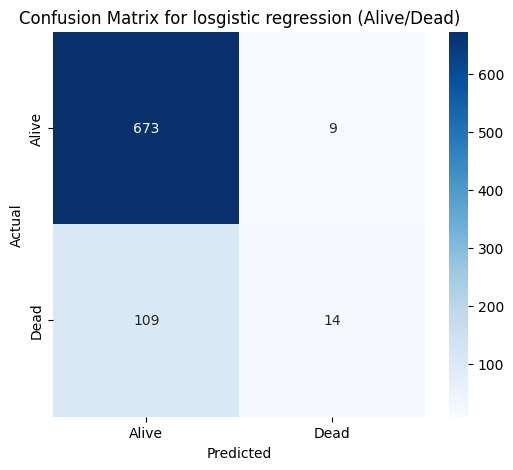

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=["Alive", "Dead"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for losgistic regression (Alive/Dead)')
plt.show()

In [ ]:
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('Prediction shape:', y_pred.shape)


X_test shape: (805, 28)
y_test shape: (805,)
Prediction shape: (805,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Mean Error')

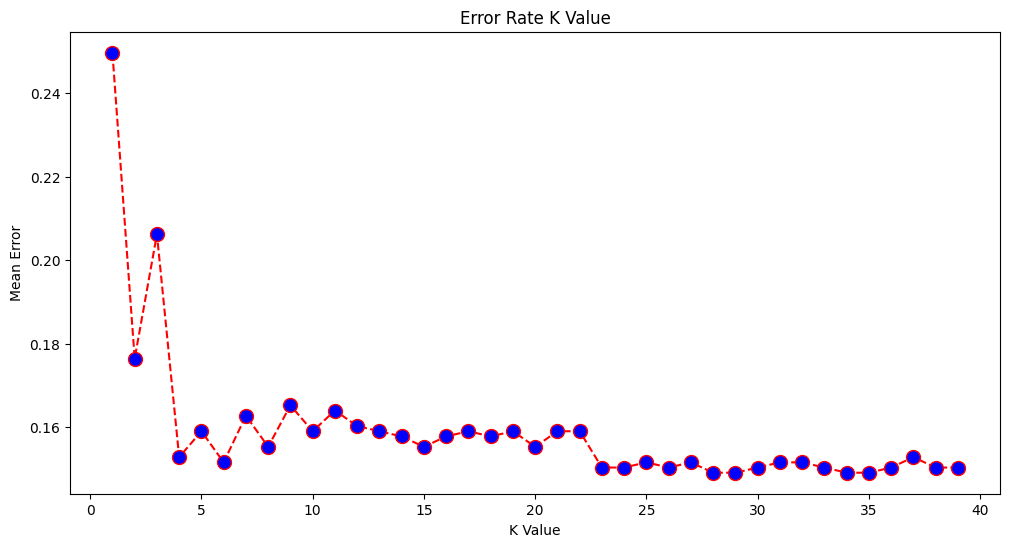

In [ ]:
error = []
import numpy as np
import matplotlib.pyplot as plt

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_classifier.predict(X_test)

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=["Alive", "Dead"])

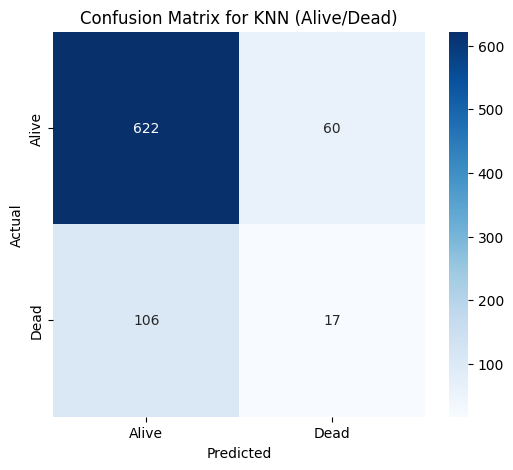

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN (Alive/Dead)')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=["Alive", "Dead"])

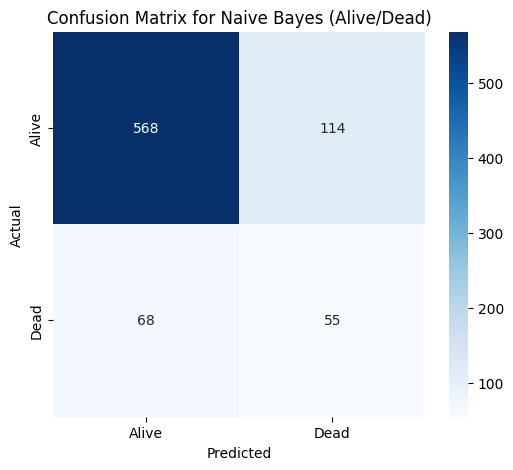

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes (Alive/Dead)')
plt.show()

In [ ]:
print(np.unique(y_pred, return_counts=True))
print(np.unique(y_pred_knn, return_counts=True))
print(np.unique(y_pred_nb, return_counts=True))

(array(['Alive', 'Dead'], dtype=object), array([782,  23]))
(array(['Alive', 'Dead'], dtype=object), array([728,  77]))
(array(['Alive', 'Dead'], dtype='<U5'), array([636, 169]))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
lr_accuracy = accuracy_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred, pos_label="Alive")
lr_precision = precision_score(y_test, y_pred, pos_label="Alive")
lr_f1 = f1_score(y_test, y_pred, pos_label="Alive")
lr_auc = roc_auc_score(pd.get_dummies(y_test)['Alive'], pd.get_dummies(y_pred)['Alive'])

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn, pos_label="Alive")
knn_precision = precision_score(y_test, y_pred_knn, pos_label="Alive")
knn_f1 = f1_score(y_test, y_pred_knn, pos_label="Alive")
knn_roc = roc_auc_score(pd.get_dummies(y_test)['Alive'], pd.get_dummies(y_pred_knn)['Alive'])

nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb, pos_label="Alive")
nb_precision = precision_score(y_test, y_pred_nb, pos_label="Alive")
nb_f1 = f1_score(y_test, y_pred_nb, pos_label="Alive")
nb_roc = roc_auc_score(pd.get_dummies(y_test)['Alive'], pd.get_dummies(y_pred_nb)['Alive'])

In [ ]:
print('LR Accuracy:', lr_accuracy)
print('LR Recall:', lr_recall)
print('LR Precision:', lr_precision)
print('LR F1 Score:', lr_f1)
print('LR AUC:', lr_auc)
print ('')
print('KNN Accuracy:', knn_accuracy)
print('KNN Recall:', knn_recall)
print('KNN Precision:', knn_precision)
print('KNN F1 Score:', knn_f1)
print('KNN AUC:', knn_roc)
print('')
print('NB Accuracy:', nb_accuracy)
print('NB Recall:', nb_recall)
print('NB Precision:', nb_precision)
print('NB F1 Score:', nb_f1)
print('NB AUC:', nb_roc)

LR Accuracy: 0.853416149068323
LR Recall: 0.9868035190615836
LR Precision: 0.860613810741688
LR F1 Score: 0.9193989071038251
LR AUC: 0.5503123286364828

KNN Accuracy: 0.7937888198757764
KNN Recall: 0.9120234604105572
KNN Precision: 0.8543956043956044
KNN F1 Score: 0.8822695035460993
KNN AUC: 0.5251174212621892

NB Accuracy: 0.7739130434782608
NB Recall: 0.8328445747800587
NB Precision: 0.8930817610062893
NB F1 Score: 0.8619119878603946
NB AUC: 0.6399995231623871


In [ ]:
training_scores = LRmodel.score(X_train, y_train)
test_scores = LRmodel.score(X_test, y_test)
print(f"Training Data Score: {training_scores}")
print(f"Testing Data Score: {test_scores}")

Training Data Score: 0.8577197887542715
Testing Data Score: 0.853416149068323


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
classifierLR2 = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'class_weight': ['balanced',None],
              'intercept_scaling': [1, 10],
              'solver': ['liblinear', 'saga','lbfgs','saga'],
              'max_iter': [4000],

}


grid_search = GridSearchCV(classifierLR2, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'intercept_scaling': [1, 10], 'max_iter': [4000],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'saga']},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'class_weight': None, 'intercept_scaling': 1, 'max_iter': 4000, 'solver': 'liblinear'}
Best Score: 0.8558576355012896


In [ ]:
grid_search.best_params_

{'C': 1,
 'class_weight': None,
 'intercept_scaling': 1,
 'max_iter': 4000,
 'solver': 'liblinear'}

In [ ]:
y_pred_lr2 = grid_search.predict(X_test)

In [ ]:
cm_lr2 = confusion_matrix(y_test, y_pred_lr2, labels=["Alive", "Dead"])

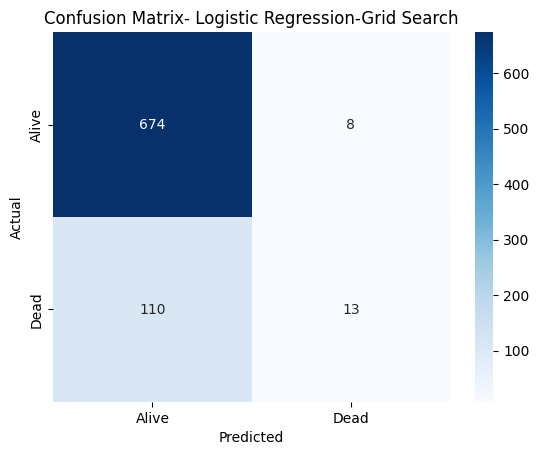

In [ ]:
sns.heatmap(cm_lr2, annot=True, fmt='d', cmap='Blues', xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix- Logistic Regression-Grid Search')
plt.show()

In [ ]:
lr_recall_grid = recall_score(y_test, y_pred_lr2, pos_label="Alive")
print(f"LR Recall with Grid Search: {lr_recall_grid}")

LR Recall with Grid Search: 0.9882697947214076


In [ ]:
partb = data

In [ ]:
partb['Survival Months'] = df['Survival Months']
partb.head()

Age   Race Marital Status T Stage N Stage 6th Stage  \
0  68.0  White        Married      T1      N1       IIA   
1  50.0  White        Married      T2      N2      IIIA   
2  58.0  White       Divorced      T3      N3      IIIC   
3  58.0  White        Married      T1      N1       IIA   
4  47.0  White        Married      T2      N1       IIB   

               differentiate  Grade  Tumor Size Estrogen Status  \
0      Poorly differentiated      3         4.0        Positive   
1  Moderately differentiated      2        35.0        Positive   
2  Moderately differentiated      2        63.0        Positive   
3      Poorly differentiated      3        18.0        Positive   
4      Poorly differentiated      3        41.0        Positive   

  Progesterone Status  Regional Node Examined  Regional Node Positive  \
0            Positive                    24.0                     1.0   
1            Positive                    14.0                     5.0   
2            Positive                    14.0                     7.0   
3            Positive                     2.0                     1.0   
4            Positive                     3.0                     1.0   

  Mortality_Status  Survival Months  
0            Alive               60  
1            Alive               62  
2            Alive               75  
3            Alive               84  
4            Alive               50

In [ ]:
partb.drop('Mortality_Status', axis=1, inplace=True)
partb.head()

Age   Race Marital Status T Stage N Stage 6th Stage  \
0  68.0  White        Married      T1      N1       IIA   
1  50.0  White        Married      T2      N2      IIIA   
2  58.0  White       Divorced      T3      N3      IIIC   
3  58.0  White        Married      T1      N1       IIA   
4  47.0  White        Married      T2      N1       IIB   

               differentiate  Grade  Tumor Size Estrogen Status  \
0      Poorly differentiated      3         4.0        Positive   
1  Moderately differentiated      2        35.0        Positive   
2  Moderately differentiated      2        63.0        Positive   
3      Poorly differentiated      3        18.0        Positive   
4      Poorly differentiated      3        41.0        Positive   

  Progesterone Status  Regional Node Examined  Regional Node Positive  \
0            Positive                    24.0                     1.0   
1            Positive                    14.0                     5.0   
2            Positive                    14.0                     7.0   
3            Positive                     2.0                     1.0   
4            Positive                     3.0                     1.0   

   Survival Months  
0               60  
1               62  
2               75  
3               84  
4               50

In [ ]:
partb.shape

(4024, 14)

In [ ]:
partb.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months'],
      dtype='object')

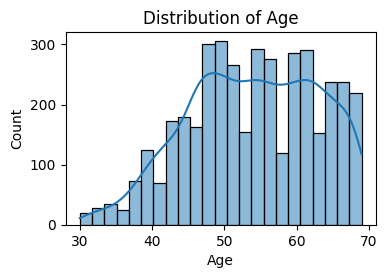

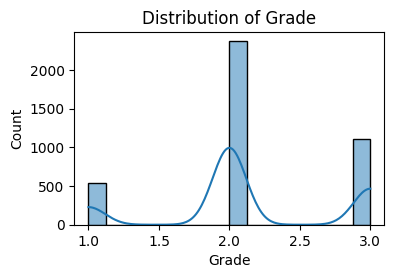

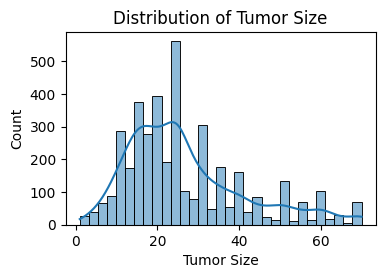

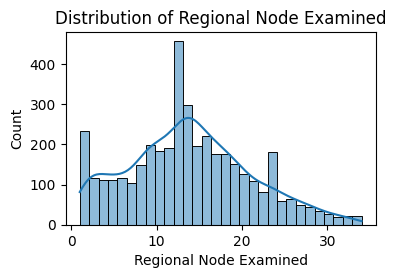

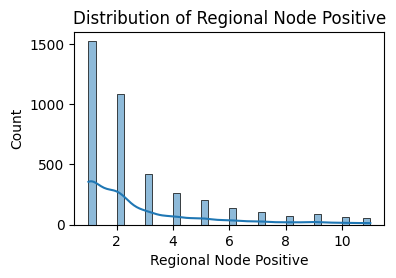

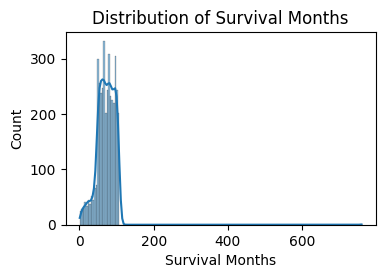

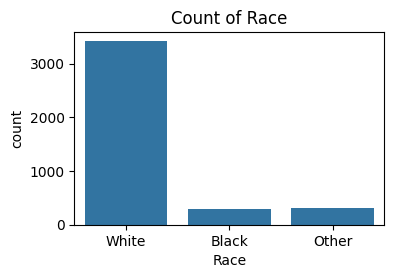

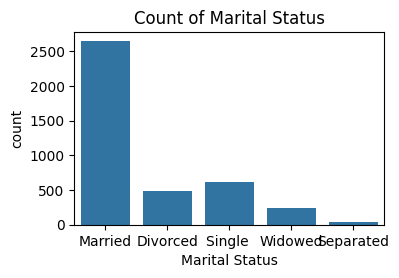

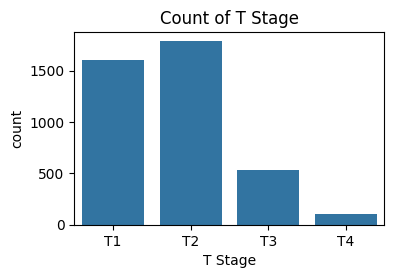

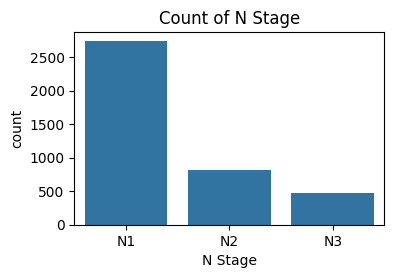

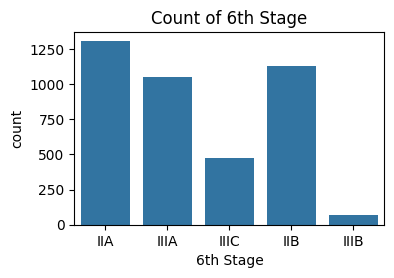

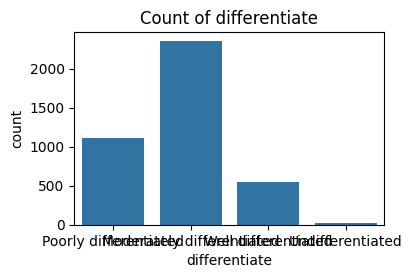

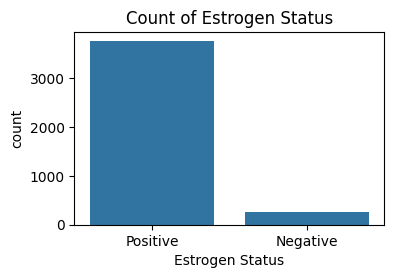

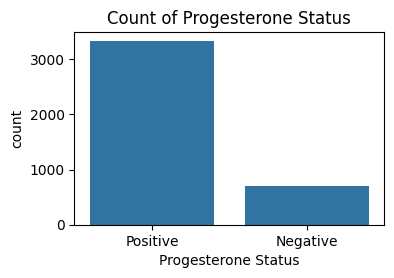

In [ ]:
numerical_cols = partb.select_dtypes(include=['number']).columns
categorical_cols = partb.select_dtypes(include=['object', 'category']).columns

for col in numerical_cols:
    plt.figure(figsize=(4, 2.5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



for col in categorical_cols:
    plt.figure(figsize=(4, 2.5))
    sns.countplot(x=data[col])
    plt.title(f'Count of {col}')
    plt.show()

In [ ]:
partb.describe().transpose()

count       mean        std   min   25%   50%    75%  \
Age                     4024.0  53.982853   8.954241  30.0  47.0  54.0  61.00   
Grade                   4024.0   2.141153   0.625465   1.0   2.0   2.0   3.00   
Tumor Size              4024.0  26.805915  14.638093   1.0  16.0  25.0  34.25   
Regional Node Examined  4024.0  13.875249   7.191970   1.0   9.0  14.0  18.00   
Regional Node Positive  4024.0   2.798459   2.379252   1.0   1.0   2.0   3.00   
Survival Months         4024.0  71.472167  25.361855   1.0  56.0  73.0  90.00   

                          max  
Age                      69.0  
Grade                     3.0  
Tumor Size               70.0  
Regional Node Examined   34.0  
Regional Node Positive   11.0  
Survival Months         760.0

In [ ]:
partb.describe(include='object').transpose()

count unique                        top  freq
Race                 4024      3                      White  3413
Marital Status       4024      5                    Married  2643
T Stage              4024      4                         T2  1786
N Stage              4024      3                         N1  2732
6th Stage            4024      5                        IIA  1305
differentiate        4024      4  Moderately differentiated  2351
Estrogen Status      4024      2                   Positive  3755
Progesterone Status  4024      2                   Positive  3326

In [ ]:
partb['Survival Months'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4024 entries, 0 to 4023
Series name: Survival Months
Non-Null Count  Dtype
--------------  -----
4024 non-null   int64
dtypes: int64(1)
memory usage: 31.6 KB


In [ ]:
partb.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months'],
      dtype='object')

In [ ]:
model1_x = partb[['Age','Tumor Size','Regional Node Examined','Regional Node Positive']]
model1_y = partb['Survival Months']

In [ ]:
model1_x_train, model1_x_test , model1_y_train, model1_y_test = train_test_split(model1_x, model1_y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [ ]:
regressor1 = DecisionTreeRegressor()

In [ ]:
regressor1.fit(model1_x_train, model1_y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_regressor1 = regressor1.predict(model1_x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('MAE', mean_absolute_error(model1_y_test, y_pred_regressor1))
print('MSE', mean_squared_error(model1_y_test, y_pred_regressor1))
print('R²:', r2_score(model1_y_test, y_pred_regressor1))

MAE 26.029813664596272
MSE 1110.207453416149
R²: -1.0772346223028166


In [ ]:
model2_x = partb [['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive']]
model2_y = partb['Survival Months']

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
categorical_columns = model2_x.select_dtypes(include=['object']).columns
numerical_columns = model2_x.select_dtypes(exclude=['object']).columns
X_encoded_ = encoder.fit_transform(model2_x.select_dtypes(include=['object']))
X_encoded_df_ = pd.DataFrame(X_encoded_, columns=encoder.get_feature_names_out(model2_x.select_dtypes(include=['object']).columns))
model2_x_combined = pd.concat([X_encoded_df_, model2_x[numerical_columns].reset_index(drop=True)], axis=1)
model2_x_train, model2_x_test, model2_y_train, model2_y_test = train_test_split(model2_x_combined, model2_y, test_size=0.2, random_state=42)

In [ ]:
regressor2 = DecisionTreeRegressor()
regressor2.fit(model2_x_train, model2_y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_regressor2 = regressor2.predict(model2_x_test)

In [ ]:
print('MAE', mean_absolute_error(model2_y_test, y_pred_regressor2))
print('MSE', mean_squared_error(model2_y_test, y_pred_regressor2))
print('R²:', r2_score(model2_y_test, y_pred_regressor2))

MAE 24.306832298136644
MSE 977.3850931677018
R²: -0.8287196222682847


In [ ]:
regressor3 = DecisionTreeRegressor(max_depth=4)
regressor3.fit(model1_x_train, model1_y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
print(tree.export_text(regressor3))

|--- feature_1 <= 34.50
|   |--- feature_3 <= 3.50
|   |   |--- feature_0 <= 48.50
|   |   |   |--- feature_2 <= 25.50
|   |   |   |   |--- value: [74.92]
|   |   |   |--- feature_2 >  25.50
|   |   |   |   |--- value: [90.17]
|   |   |--- feature_0 >  48.50
|   |   |   |--- feature_1 <= 10.50
|   |   |   |   |--- value: [76.62]
|   |   |   |--- feature_1 >  10.50
|   |   |   |   |--- value: [72.05]
|   |--- feature_3 >  3.50
|   |   |--- feature_2 <= 15.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- value: [4.00]
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- value: [67.08]
|   |   |--- feature_2 >  15.50
|   |   |   |--- feature_2 <= 33.50
|   |   |   |   |--- value: [72.22]
|   |   |   |--- feature_2 >  33.50
|   |   |   |   |--- value: [12.00]
|--- feature_1 >  34.50
|   |--- feature_3 <= 1.50
|   |   |--- feature_2 <= 7.50
|   |   |   |--- feature_0 <= 63.50
|   |   |   |   |--- value: [70.50]
|   |   |   |--- feature_0 >  63.50
|   |   |   |   |--- value: [60

In [ ]:
prepruned_tree = plt.figure(figsize=(200,200))
tree.plot_tree(regressor3, feature_names=list(model2_x_train.columns), filled=True)


[Text(0.5, 0.9, 'Race_Other <= 34.5\nsquared_error = 670.18\nsamples = 3219\nvalue = 71.38'),
 Text(0.25, 0.7, 'Marital Status_Divorced <= 3.5\nsquared_error = 686.192\nsamples = 2419\nvalue = 72.689'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Race_Black <= 48.5\nsquared_error = 722.382\nsamples = 1895\nvalue = 73.588'),
 Text(0.0625, 0.3, 'Race_White <= 25.5\nsquared_error = 1315.184\nsamples = 551\nvalue = 76.027'),
 Text(0.03125, 0.1, 'squared_error = 447.041\nsamples = 511\nvalue = 74.92'),
 Text(0.09375, 0.1, 'squared_error = 12189.894\nsamples = 40\nvalue = 90.175'),
 Text(0.1875, 0.3, 'Race_Other <= 10.5\nsquared_error = 475.91\nsamples = 1344\nvalue = 72.588'),
 Text(0.15625, 0.1, 'squared_error = 426.362\nsamples = 159\nvalue = 76.616'),
 Text(0.21875, 0.1, 'squared_error = 480.089\nsamples = 1185\nvalue = 72.047'),
 Text(0.375, 0.5, 'Race_White <= 15.5\nsquared_error = 541.819\nsamples = 524\nvalue = 69.437'),
 Text(0.3125, 0.3, 'Race_Other <= 2.5\nsquared_error = 571.

In [ ]:
from google.colab import files
prepruned_tree.savefig('Prepruned.png')
files.download('Prepruned.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
New_patient = pd.DataFrame({
    "Age": [56],
    "Race": ['White'],
    "Marital Status": ['Single '],
    "T Stage": ["T3"],
    "N Stage": ["N3"],
    "6th Stage": ["IIIC"],
    "differentiate": ["Moderately differentiated"],
    "Grade": [2],
    "Tumor Size": [41],
    "Estrogen Status": ["Positive"],
    "Progesterone Status": ["Positive"],
    "Regional Node Examined": [5],
    "Regional Node Positive": [1]
})

print(New_patient)

   Age   Race Marital Status T Stage N Stage 6th Stage  \
0   56  White        Single       T3      N3      IIIC   

               differentiate  Grade  Tumor Size Estrogen Status  \
0  Moderately differentiated      2          41        Positive   

  Progesterone Status  Regional Node Examined  Regional Node Positive  
0            Positive                       5                       1  


In [ ]:
cat2 = New_patient.select_dtypes(include=['object']).columns
num2 = New_patient.select_dtypes(exclude=['object']).columns

In [ ]:
New_patient_encoded = encoder.transform(New_patient[cat2])
New_patient_encoded_df = pd.DataFrame(New_patient_encoded, columns=encoder.get_feature_names_out(cat2))
New_patient_combined = pd.concat([New_patient_encoded_df, New_patient[num2].reset_index(drop=True)], axis=1)

In [ ]:
y_pred_regressor4 = regressor2.predict(New_patient_combined)

In [ ]:
print("Predicted Survival Months:", y_pred_regressor4)

Predicted Survival Months: [85.]
